In [ ]:
from deeptrace import BrainStack
# to show in git, set to qt or notebook for interactive
%matplotlib inline 
import numpy as np
import pylab as plt

# open the raw data (this will also downsample unless (downsample=false))

from tqdm.notebook import tqdm
pbar = tqdm() # create a progress bar so you can see the progress.
stack = BrainStack(channel_folders=['../../sampledata/210723_NAc326F_488_s3_0_8x_13-31-25/',
                   '../../sampledata/210723_NAc326F_640_s3_0_8x_11-50-51/'],
                   downsample = True, 
                   pbar = pbar)
pbar.close()  # close the progress bar

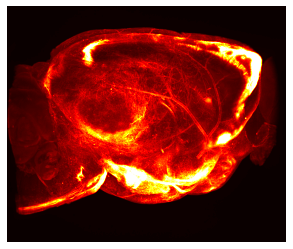

In [34]:
# MAX projection of the downsampled axons channel
fig = plt.figure(figsize = [5,5])
# plt.imshow(stack.downsampled_data[0].max(axis = 0).T,cmap = 'gray')
plt.imshow(stack.downsampled_data[1].max(axis = 0).T,cmap = 'hot')
plt.axis('off');

In [ ]:
# Open the downsampled stacks in NAPARI
import napari
view = napari.Viewer()

# for s in stack.downsampled_data:
dd = np.stack(stack.downsampled_data).transpose(1,0,2,3)
imview = view.add_image(dd)

In [ ]:
# Example of how to downsample a stack (does not save)
# use BrainStack to save the stack and load it from a file instead.
from deeptrace import *
from tqdm.notebook import tqdm

scales = deeptrace_preferences['downsample_factor']
pbar = tqdm(total = len(stack))

stack.set_active_channels(0)
data = downsample_stack(stack,scales,pbar = pbar,chunksize = 256)

pbar.set_description('Done.')
pbar.close()
